**Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
### Keras and Tensorflow >2.0

In [10]:
### Data Collection
import pandas_datareader as pdr
key=""
import pandas as pd

In [11]:
df=pd.read_csv('/content/AAPL.csv')

In [12]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

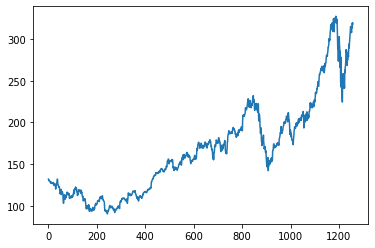

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [18]:
import numpy as np

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(817, 441)

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [28]:

print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [35]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

In [37]:
X_test

array([[[0.52651355],
        [0.52837119],
        [0.53119986],
        ...,
        [0.26154691],
        [0.25187875],
        [0.26483999]],

       [[0.52837119],
        [0.53119986],
        [0.53871485],
        ...,
        [0.25187875],
        [0.26483999],
        [0.27273495]],

       [[0.53119986],
        [0.53871485],
        [0.5461454 ],
        ...,
        [0.26483999],
        [0.27273495],
        [0.2766191 ]],

       ...,

       [[0.81875369],
        [0.84256523],
        [0.84210082],
        ...,
        [0.92544119],
        [0.91771511],
        [0.9483239 ]],

       [[0.84256523],
        [0.84210082],
        [0.84936249],
        ...,
        [0.91771511],
        [0.9483239 ],
        [0.94064004]],

       [[0.84210082],
        [0.84936249],
        [0.85835515],
        ...,
        [0.9483239 ],
        [0.94064004],
        [0.96635143]]])

In [38]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
# LSTM input must be similar to X_train.shape[1] , 1
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0146 - val_loss: 0.0565
Epoch 2/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0027 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 2s 179ms/step - loss: 9.5134e-04 - val_loss: 0.0088
Epoch 4/100
12/12 [==============================] - 2s 180ms/step - loss: 7.9251e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 2s 178ms/step - loss: 7.3508e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 6.0610e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 2s 183ms/step - loss: 5.8594e-04 - val_loss: 0.0041
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 5.8817e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 6.3382e-04 - val_loss: 0.0041
Epoch 10/100
12/12 [==============================] - 2s 188ms/

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.3.0'

In [46]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.0261118292479

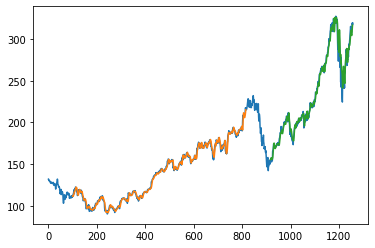

In [49]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()